In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/final_audio/data_set_fusion/expert6/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/final_audio/data_set_fusion/expert6/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/final_audio/data_set_fusion/expert6/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(207, 1653, 207, 1653, 207, 207)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(1860, 1860)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

1860

In [10]:
df_train

,labels
0,4
1,1
2,2
3,3
4,2
...,...
1855,3
1856,0
1857,4
1858,4


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,7.780105e-06,0.000040,0.000027,0.000160,5.380579e-05,0.999712,5.012379e-11,3.684628e-07,6.224298e-03,4.627211e-04,3.444082e-06,9.933091e-01
1,7.297665e-05,0.999754,0.000043,0.000120,4.270825e-07,0.000010,9.641091e-01,2.669121e-02,6.304387e-03,3.033268e-04,1.269191e-06,2.590803e-03
2,1.916489e-05,0.000300,0.000004,0.999334,1.249728e-05,0.000331,2.391128e-02,1.680510e-03,4.879356e-07,9.744072e-01,2.952331e-10,6.067733e-07
3,1.874786e-07,0.000104,0.999859,0.000005,2.123697e-06,0.000030,5.321316e-09,6.407788e-06,9.951490e-01,1.355079e-05,1.689682e-05,4.814266e-03
4,6.415075e-07,0.000002,0.000005,0.000050,9.997198e-01,0.000222,1.379643e-10,9.318503e-11,3.736208e-07,7.188797e-08,9.999995e-01,3.330854e-09
...,...,...,...,...,...,...,...,...,...,...,...,...
202,5.623411e-05,0.000234,0.003189,0.002262,5.129320e-04,0.993745,1.424587e-11,1.239000e-01,7.565239e-02,3.710574e-04,2.415475e-06,8.000742e-01
203,1.472854e-07,0.000249,0.999723,0.000006,1.929889e-06,0.000020,1.006677e-08,5.733472e-07,9.681415e-01,2.566828e-04,3.158712e-02,1.415399e-05
204,8.814672e-06,0.000075,0.000053,0.000206,2.076775e-04,0.999449,1.038829e-02,3.773066e-03,5.640590e-02,7.683203e-02,3.391310e-03,8.492094e-01
205,1.981894e-07,0.000106,0.999857,0.000006,4.204789e-06,0.000026,6.773360e-06,4.564986e-08,9.390048e-01,3.600182e-05,6.093900e-02,1.333734e-05


In [13]:
len(x_test),len(x_train)

(207, 1860)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,5.110107e-07,0.000003,1.590872e-06,0.000024,0.999869,0.000102,2.835891e-03,1.436061e-03,1.658625e-04,3.749105e-05,9.955010e-01,2.372283e-05
1,4.388915e-05,0.999194,1.771843e-04,0.000548,0.000006,0.000030,6.377333e-04,9.925016e-01,4.295442e-04,5.291133e-03,2.300187e-06,1.137630e-03
2,1.616983e-07,0.000217,9.997681e-01,0.000005,0.000001,0.000009,7.749664e-04,1.693103e-03,9.843473e-01,3.590833e-04,5.303353e-05,1.277249e-02
3,6.566693e-05,0.000115,4.973264e-07,0.999346,0.000241,0.000232,2.623951e-04,1.553866e-06,3.487292e-03,9.941869e-01,1.483665e-03,5.781858e-04
4,2.649658e-06,0.003611,9.962283e-01,0.000017,0.000001,0.000140,1.718150e-11,8.203830e-06,9.999918e-01,2.404246e-12,7.817844e-12,8.751447e-12
...,...,...,...,...,...,...,...,...,...,...,...,...
1855,2.409035e-05,0.000075,9.488845e-07,0.999642,0.000009,0.000250,2.683446e-09,3.941940e-05,1.976865e-09,9.970955e-01,2.607429e-03,2.576215e-04
1856,9.955193e-01,0.001356,7.494498e-07,0.001737,0.000022,0.001365,9.326106e-01,6.266353e-02,3.045640e-03,1.490545e-03,1.509235e-04,3.888915e-05
1857,2.784763e-07,0.000001,1.670589e-06,0.000019,0.999886,0.000092,2.756317e-08,9.796824e-10,3.647917e-05,2.185609e-06,9.999608e-01,4.612859e-07
1858,1.203074e-05,0.000096,5.784472e-05,0.009850,0.986992,0.002992,8.045603e-07,2.001047e-06,6.268712e-03,7.322072e-04,8.208947e-01,1.721016e-01


In [15]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [16]:
len(new_y_train)

1860

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

In [18]:
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape

(array([4, 1, 2, ..., 4, 4, 2]), (1860,))

# training machine learning

In [19]:
from sklearn.svm import SVC
model = SVC(random_state=seed, kernel='rbf')
svm=model.fit(x_train,y_train)
predictions = model.predict(x_test)
#print("Restored model, accuracy: {:5.2f}%".format(100*acc))

In [20]:
predictions

array([5, 1, 3, 2, 4, 3, 5, 5, 2, 4, 0, 0, 4, 5, 4, 3, 3, 4, 3, 3, 4, 1,
       4, 5, 0, 4, 4, 2, 3, 4, 5, 3, 1, 3, 5, 3, 5, 5, 0, 5, 0, 4, 3, 2,
       2, 5, 2, 5, 4, 3, 2, 1, 4, 5, 1, 4, 1, 0, 1, 0, 4, 0, 4, 1, 3, 1,
       5, 3, 3, 1, 1, 2, 4, 4, 1, 3, 1, 1, 1, 0, 5, 1, 5, 4, 1, 3, 2, 0,
       5, 5, 2, 3, 2, 5, 5, 1, 3, 3, 5, 2, 0, 4, 4, 2, 1, 3, 1, 4, 3, 5,
       2, 5, 3, 2, 5, 5, 3, 2, 3, 2, 1, 3, 1, 1, 3, 1, 5, 1, 3, 4, 4, 3,
       5, 5, 5, 4, 2, 0, 1, 4, 4, 2, 1, 2, 3, 2, 5, 4, 5, 4, 4, 5, 1, 1,
       2, 1, 2, 2, 2, 2, 1, 2, 3, 5, 4, 4, 4, 2, 1, 0, 1, 2, 2, 3, 2, 4,
       0, 1, 3, 5, 1, 5, 1, 5, 4, 5, 3, 1, 2, 2, 4, 1, 3, 3, 2, 5, 5, 3,
       1, 1, 3, 2, 5, 2, 5, 2, 2])

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.93      0.97      0.95        38
           2       1.00      0.90      0.95        42
           3       1.00      0.93      0.96        41
           4       0.97      0.97      0.97        36
           5       0.93      1.00      0.96        38

    accuracy                           0.96       207
   macro avg       0.95      0.96      0.95       207
weighted avg       0.96      0.96      0.96       207

----accuracy score 95.65217391304348 ----


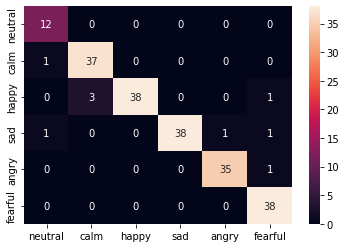

In [21]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','calm', 'happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [22]:
path='/content/drive/My Drive/fusion/fusion_model/SVM/rbf/expert6 '
savedvX = joblib.dump(model, path)

print("MODEL SAVED")

MODEL SAVED
